<a href="https://colab.research.google.com/github/Twenkid/Colab-Notebooks-AI-ML-CV/blob/main/sd3_diffusers_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: wenshao

email: wenshaoguo1026@gmail.com

欢迎关注我的视频号: 温少的AIGC, 会分享我做的一些AIGC的东西~

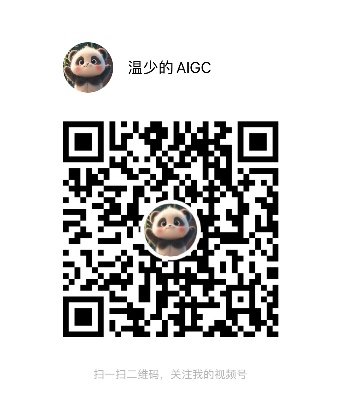

## 设置运行环境
运行stable diffusion 3需要用到GPU，注意要选择colab的T4 GPU。

具体操作为点击右上角的其他连接选项->更改运行时类型->T4 GPU->保存。

可以通过以下命令验证是否已成功使用上GPU。

In [ ]:
!nvidia-smi

Thu Jun 13 03:42:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 获取HF token

因为sd3的weight需要填写表格并同意相关的协议才能下载，所以要获取hf token才能在colab正常下载使用。

请按照以下步骤进行操作：

1. 确保你已经注册并登陆过[huggingface](https://huggingface.co/).
2. 在[sd3页面](https://huggingface.co/stabilityai/stable-diffusion-3-medium),填写表格并同意相关协议。
3. 点击右上角你的头像->选择settings-> 在左侧栏选择Access Tokens->点击New Token创建一个token并copy。**注意在创建token的时候type一定要选择read。**
4. 在colab左侧点击那个像钥匙的按钮，点击增加新的密钥，名称写：HF_TOKEN，值写第三步获得的token。并点击开启。




In [8]:
# 填写上面获取到的hf token
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

## 安装必要的python库

In [1]:
!pip install diffusers
!pip install accelerate > 0.17.0
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 8.1 MB/s eta 0:00:00


In [7]:
HF_TOKEN

NameError: name 'HF_TOKEN' is not defined

## 测试

In [2]:
import torch
import diffusers
import matplotlib
import accelerate
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
print(accelerate.__version__)
print(torch.__version__)

1.12.0
2.9.0+cu126


### 下面这个速度比较慢，但是保留了T5 Text Encoder

In [11]:
import torch
from diffusers import StableDiffusion3Pipeline
from transformers import T5EncoderModel, BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(load_in_8bit=True)

model_id = "stabilityai/stable-diffusion-3-medium-diffusers"
text_encoder = T5EncoderModel.from_pretrained(
    model_id,
    subfolder="text_encoder_3",
    quantization_config=quantization_config,
)
pipe = StableDiffusion3Pipeline.from_pretrained(
    model_id,
    text_encoder_3=text_encoder,
    device_map="balanced",
    torch_dtype=torch.float16
)

image = pipe(
    #prompt="a photo of a cat holding a sign that says hello world",
    prompt="a photo of a cat holding a sign that says hello world",
    negative_prompt="bad quality,worst quality,blur",
    num_inference_steps=28,
    height=768,
    width=768,
    guidance_scale=7.0,
).images[0]

plt.imshow(image)

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers.
401 Client Error. (Request ID: Root=1-697aa880-040ebac91b49fb5a05d2c36c;28fbf657-3ad8-4669-a457-393ca7558b20)

Cannot access gated repo for url https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers/resolve/main/text_encoder_3/config.json.
Access to model stabilityai/stable-diffusion-3-medium-diffusers is restricted. You must have access to it and be authenticated to access it. Please log in.

In [ ]:
import gc
del pipe
del text_encoder
gc.collect()
for _ in range(10):
  torch.cuda.empty_cache()

89

### 速度比较快，抛弃了T5 Text Encoder，据说性能应该不会掉很多，但是文字生成效果可能会变差

model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/4.17G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/739 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/28 [00:00<?, ?it/s]

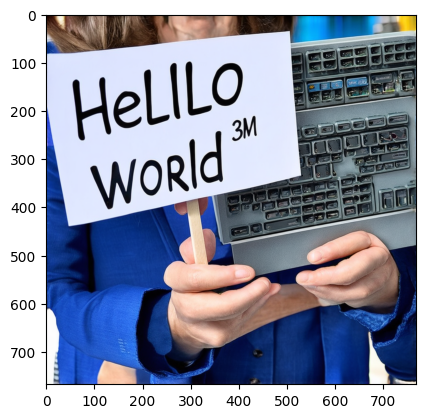

In [12]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    text_encoder_3=None,
    tokenizer_3=None,
    torch_dtype=torch.float16,
    token=hf_token
)
pipe.to("cuda")

image = pipe(
    #prompt="a photo of a cat holding a sign that says hello world",
    prompt="a photo of a Pravetz-8M PC holding a sign that says hello world",
    negative_prompt="bad quality,worst quality,blur",
    num_inference_steps=28,
    height=768,
    width=768,
    guidance_scale=7.0,
).images[0]
plt.imshow(image)